In [ ]:

!pip install -q  seaborn
!pip install -q scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats


In [ ]:
fname_temp = 'data.pkl'
__labels = ['MI', 'S1', 'S2', 'S3', 'S4', 'S5']
fields_x = ['SDV3_Centroid','SDV4_Centroid','SDV16_Centroid','SDV17_Centroid','SDV18_Centroid','SDV22_Centroid', 'SDV23_Centroid', 'SDV24_Centroid']

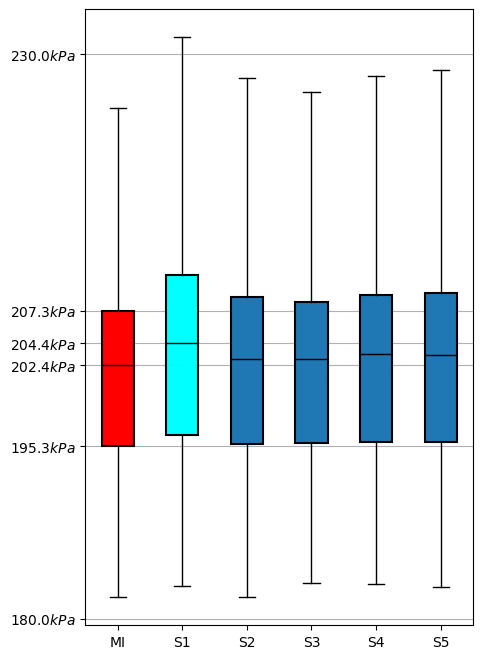

In [ ]:

_field = 'SDV4_Centroid'

with open(fname_temp, 'rb') as f:
    __dct = pickle.load(f)

__all_data = [__dct[k][_field]['healthy'] for k in __dct.keys()]
plt.figure(figsize=(5, 8))
theme = {}
width_tmp = 1 
bplot = plt.boxplot(__all_data, showfliers=False, patch_artist=True, 
                    meanline=True, showmeans=True, showcaps=True, showbox=True,
                    meanprops={'color': 'black',      'linewidth': width_tmp, 'linestyle': '-'}, 
                    medianprops={'color': 'black',    'linewidth': 0.01* width_tmp, 'linestyle': '--'},
                    whiskerprops={'color': 'black',   'linewidth': width_tmp, 'linestyle': '-'},
                    capprops={'color': 'black',       'linewidth': width_tmp, 'linestyle': '-'}, 
                    boxprops={'color': 'black',       'linewidth': width_tmp*1.5, 'linestyle': '-'}, 
                    flierprops=dict(marker='o', markerfacecolor='black', markersize=3*width_tmp, linestyle='none'),
                    labels=__labels,
                )

bplot['boxes'][0].set_facecolor('red')  
bplot['boxes'][1].set_facecolor('cyan')

mean_mi = np.mean(__all_data[0])
q1_mi, q3_mi = np.percentile(__all_data[0], [25, 75])
mean_s1 = np.mean(__all_data[1])
yticks = [180000, q1_mi, mean_mi, mean_s1,q3_mi, 230000]
ytick_labels = [f'${i/1000:.1f} kPa$' for i in yticks]
plt.yticks(yticks, ytick_labels)
plt.grid(axis='y')
plt.show()



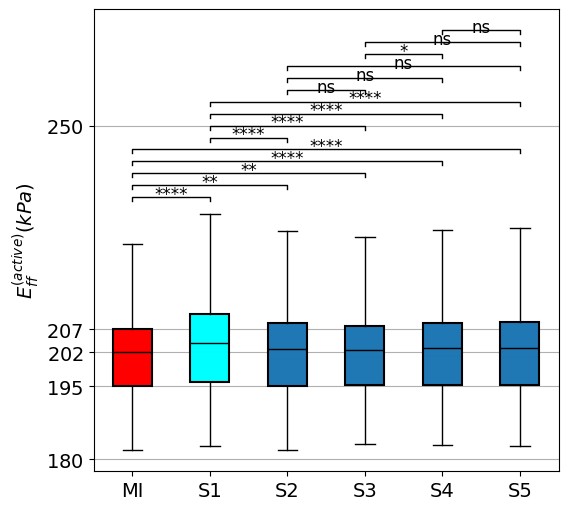

In [35]:
_field = 'SDV4_Centroid'
__labels = ['MI', 'S1', 'S2', 'S3', 'S4', 'S5']

indices = [(0, 1), (1, 2), (0, 2), (0, 3), (0, 4), (0 ,5)]
# indices = [(0, 1), (1, 2), (1, 4), (0, 4)]
indices = [(i, j) for i in range(6) for j in range(i+1, 6)]
           
q_min, q_max = 180000, 250000
hh = q_max * 0.94
hhs = q_max * 0.01

pvalues_map = lambda p: '****' if p < 0.0001 else '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'


with open(fname_temp, 'rb') as f:
    __dct = pickle.load(f)

__all_data = [__dct[k][_field]['healthy'] for k in __dct.keys()]
plt.figure(figsize=(6, 6))
theme = {}
width_tmp = 1 

bplot = plt.boxplot(
    __all_data, showfliers=False, patch_artist=True, meanline=True, showmeans=True, showcaps=True, showbox=True, 
    meanprops={'color': 'black', 'linewidth': width_tmp, 'linestyle': '-'
    }, medianprops={'color': 'black',    'linewidth': 0.01* width_tmp, 'linestyle': '--'}, 
    whiskerprops={'color': 'black',   'linewidth': width_tmp, 'linestyle': '-'}, 
    capprops={'color': 'black', 'linewidth': width_tmp, 'linestyle': '-'},
    boxprops={'color': 'black',       'linewidth': width_tmp*1.5, 'linestyle': '-'}, 
    flierprops=dict(marker='o', markerfacecolor='black', markersize=3*width_tmp, linestyle='none'), 
    labels=__labels,
)

bplot['boxes'][0].set_facecolor('red')  
bplot['boxes'][1].set_facecolor('cyan')

mean_mi = np.mean(__all_data[0])
q1_mi, q3_mi = np.percentile(__all_data[0], [25, 75])
yticks = [q_min, q1_mi, mean_mi, q3_mi, q_max]
ytick_labels = [f'${i/1000:.0f}$' for i in yticks]
plt.yticks(yticks, ytick_labels)
plt.grid(axis='y')


pvalues = {inds: [] for inds in indices}
for inds in indices:
    pvalues[inds] = stats.ttest_ind(__all_data[inds[0]], __all_data[inds[1]]).pvalue

for i, inds in enumerate(indices):
    x0, x1 = inds
    x0, x1 = x0+1, x1+1
    plt.plot([x0, x0, x1,  x1], [hh-hhs/3, hh, hh, hh-hhs/3], 'k-', lw=1)
    plt.text((x0+x1)/2, hh-hhs/2, f'{pvalues_map(pvalues[inds])}', ha='center', va='bottom', fontsize=12)
    hh += hhs

plt.ylabel("$E_{ff}^{(active)} (kPa)$", fontsize=14)
# plt.gca().yaxis.tick_right()
plt.xticks(fontsize=14)

plt.yticks(fontsize=14)
plt.show()



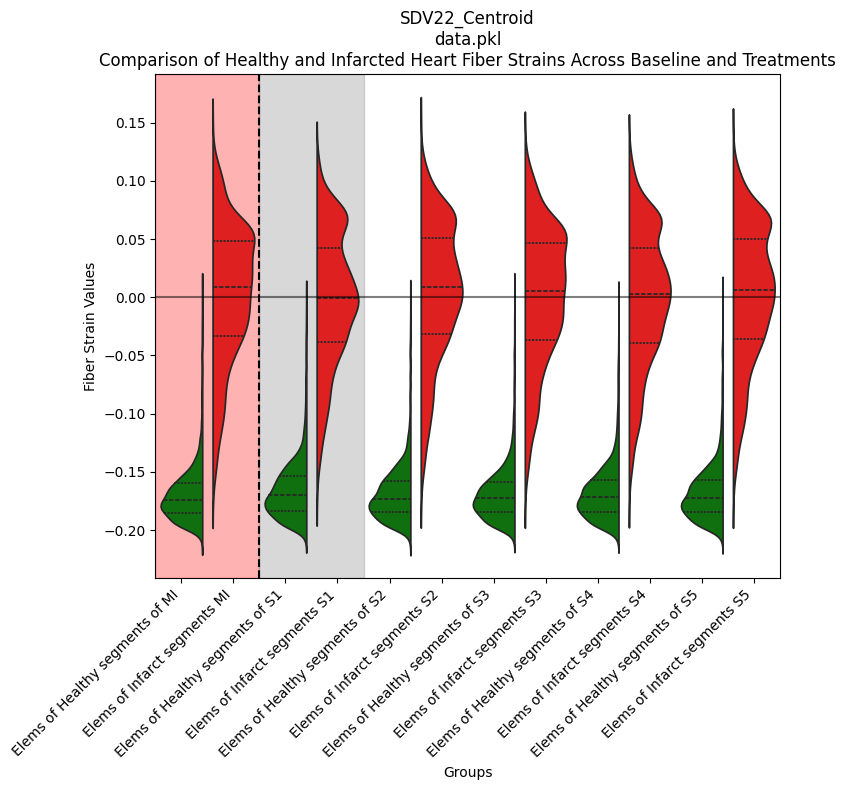

In [39]:
files_pkl = [fname_temp]


for fpk in files_pkl:
    with open(fpk, 'rb') as f:
        __dct = pickle.load(f)

    for field_name in ['SDV22_Centroid']: # fields_x:
        healthy_data_array = np.array([list(__dct[k][field_name]['healthy']) for k in __dct.keys()])
        infarct_data_array = np.array([list(__dct[k][field_name]['infarct']) for k in __dct.keys()])

        plt.figure(figsize=(8, 8))

        data_combined = []
        labels = []
        palette = []

        plt.axvspan(-0.5, 1.5, color='red', alpha=0.3)
        plt.axvspan(1.5, 3.5, color='gray', alpha=0.3)


        for i in range(0, len(healthy_data_array)):
            data_combined.append(healthy_data_array[i])
            data_combined.append(infarct_data_array[i])
            _specimen_tag = f"S{i}" if i > 0 else "MI"
            labels.extend([f'Elems of Healthy segments of {_specimen_tag}', f'Elems of Infarct segments {_specimen_tag}'])
            palette.extend(['green', 'red'])

        sns.violinplot(data=data_combined, inner="quartile", palette=palette, split=True)

        plt.title(f'{field_name}\n{fpk}\nComparison of Healthy and Infarcted Heart Fiber Strains Across Baseline and Treatments')
        plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=45, ha='right')
        plt.xlabel('Groups')
        plt.ylabel('Fiber Strain Values')


        plt.axvline(x=1.5, color='black', linestyle='--')
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)

        plt.tight_layout()
        plt.show()

<Figure size 1400x800 with 0 Axes>

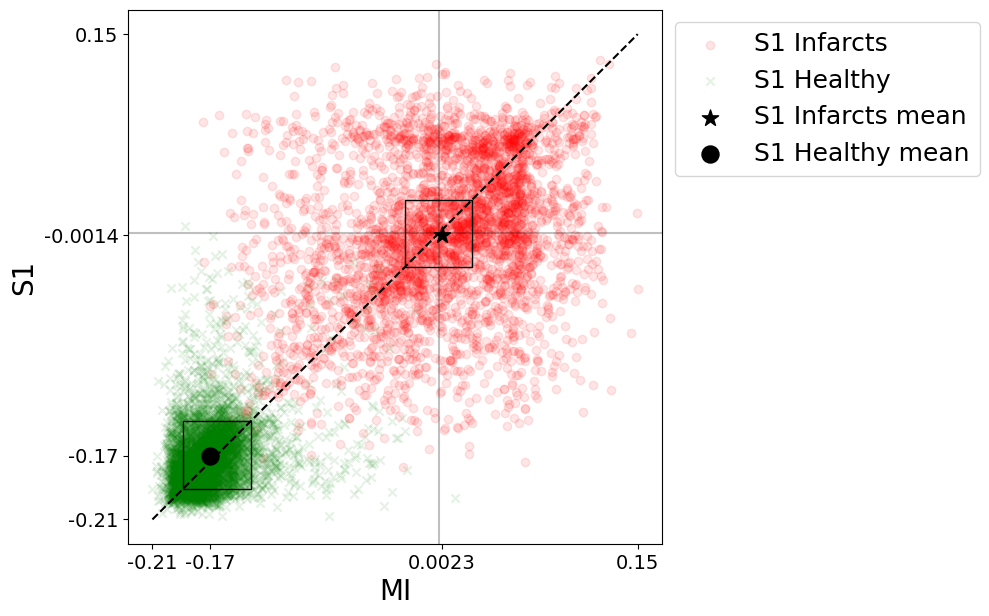

<Figure size 1400x800 with 0 Axes>

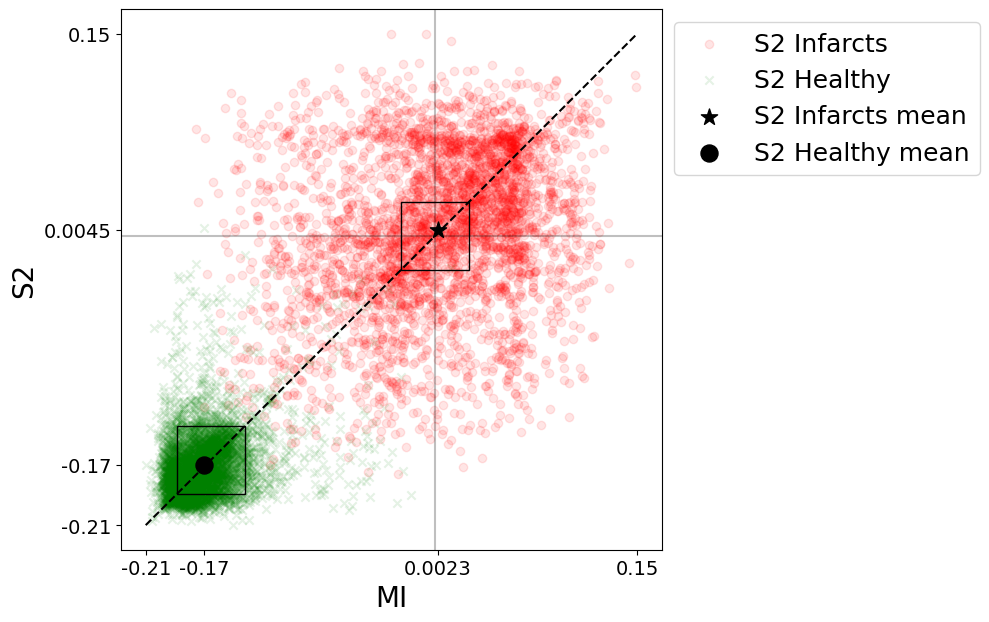

<Figure size 1400x800 with 0 Axes>

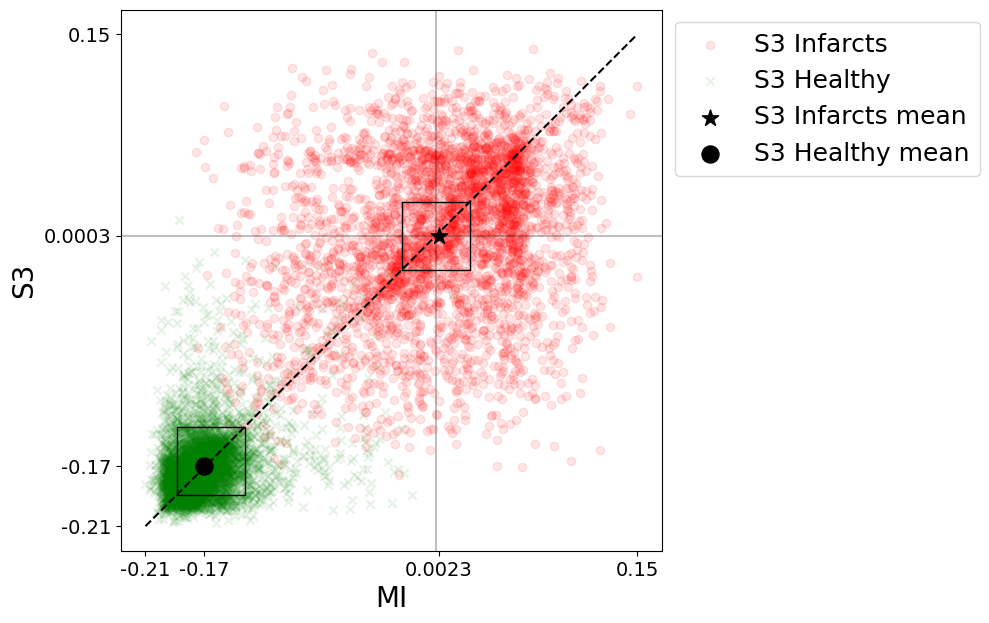

<Figure size 1400x800 with 0 Axes>

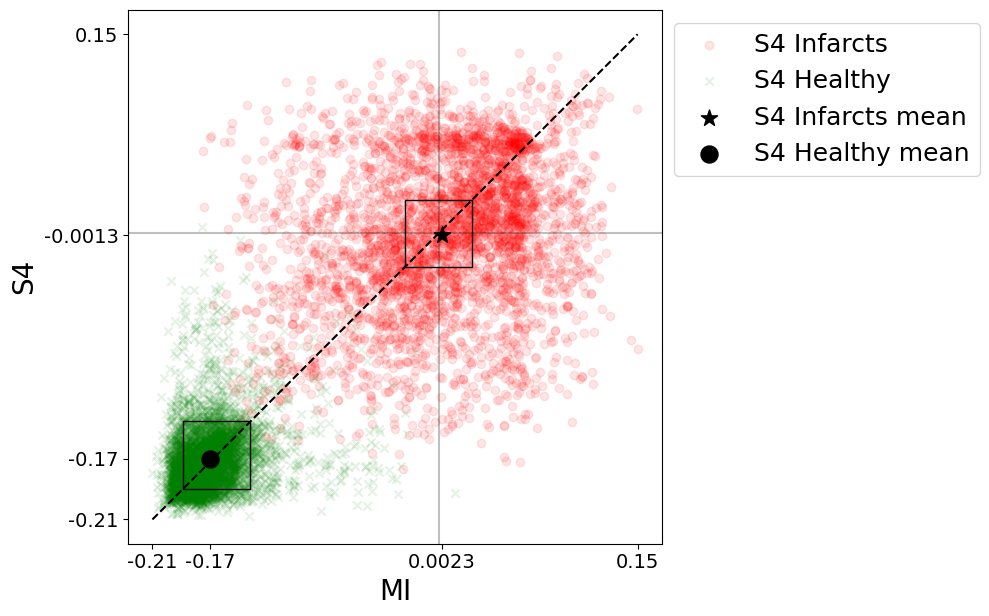

<Figure size 1400x800 with 0 Axes>

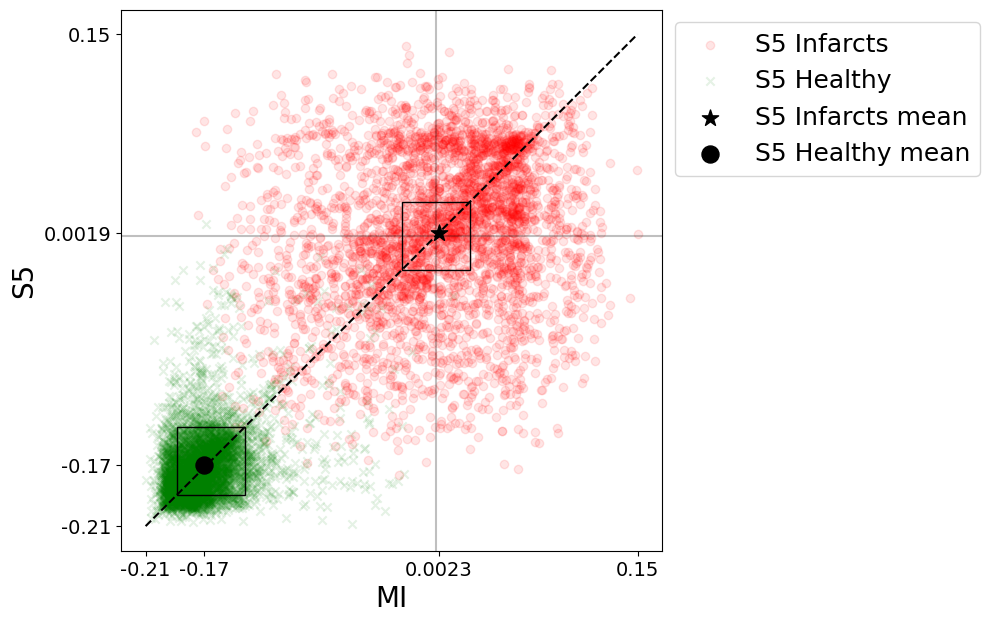

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

files_pkl = ['data.pkl']
files_pkl = ['data.pkl']

_fields_x = fields_x
_fields_x = ['SDV22_Centroid']

for fpk in files_pkl:
    with open(fpk, 'rb') as f:
        __dct = pickle.load(f)

    for field_name in _fields_x:
        healthy_data_array = np.array([list(__dct[k][field_name]['healthy']) for k in __dct.keys()])
        infarct_data_array = np.array([list(__dct[k][field_name]['infarct']) for k in __dct.keys()])



linear_fit_details = {}
colors = ['blue', 'green', 'orange', 'purple', 'brown']

if True:
    i=1

ref_ind = 0


for i in range(1, len(infarct_data_array)):
    plt.figure(figsize=(14, 8))
    plt.figure(figsize=(10,10))
    # plt.figure(figsize=(4,4))

    x = infarct_data_array[ref_ind].reshape(-1, 1) 
    y = infarct_data_array[i]  
    plt.scatter(x, y, marker='o', color='r', 
                label=f"S{i} Infarcts",  
                alpha=0.1)

    linear_model = LinearRegression(fit_intercept=False)
    linear_model.fit(x, y)
    y_pred_linear = linear_model.predict(x)

    label = f'S{i} Infarcts ({linear_model.coef_[0]:.2f}x + {linear_model.intercept_:.2f}) | R^2: {linear_model.score(x, y):.2f}' 
    star_loc = np.mean(x), np.mean(y)

    mx = np.max([np.max(y), np.max(x)])
    mn = np.min([np.min(y), np.min(x)])
    


    x = healthy_data_array[ref_ind].reshape(-1, 1) 
    y = healthy_data_array[i]  
    plt.scatter(x, y, marker='x', color='g', 
                label=f"S{i} Healthy",  
                alpha=0.1)
    linear_model = LinearRegression(fit_intercept=False)
    linear_model.fit(x, y)
    y_pred_linear = linear_model.predict(x)
    label = f'S{i} Healthy ({linear_model.coef_[0]:.2f}x + {linear_model.intercept_:.2f}) | R^2: {linear_model.score(x, y):.2f}' 
    # plt.plot(x, y_pred_linear, color='#006600', linestyle='-', label=label)

    circ_loc = np.mean(x), np.mean(y)

    plt.scatter(star_loc[0], star_loc[1], marker='*', color='#000000', label=f'S{i} Infarcts mean', s=150)
    plt.scatter(circ_loc[0], circ_loc[1], marker='o', color='#000000', label=f'S{i} Healthy mean', s=150)


    mx = np.max([mx, np.max(y), np.max(x)])
    mn = np.min([mn, np.min(y), np.min(x)])


    plt.title('Scatter Plot and Linear Regression Lines for Baseline Infarct vs. Treatment Infarcts')
    plt.title('')
    plt.xlabel('Baseline Infarct Fiber Strains')
    plt.ylabel('Treatment Infarct Fiber Strains')

    plt.xticks([mn, circ_loc[0], star_loc[0],  mx], [f'{mn:.2f}', f'{circ_loc[0]:.2f}', f'{star_loc[0]:.4f}', f'{mx:.2f}'], fontsize=14)
    plt.yticks([mn, circ_loc[1], star_loc[1],  mx], [f'{mn:.2f}', f'{circ_loc[1]:.2f}', f'{star_loc[1]:.4f}', f'{mx:.2f}'], fontsize=14)
    
    plt.xlabel('MI', fontsize=20)
    plt.ylabel(f'S{i}', fontsize=20)

    # plt.legend(loc='best', fontsize=18)
    ## legend outside 
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=18)
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.25)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.25)

    plt.plot([mn, mx], [mn, mx], color='black', linestyle='--', label='y=x')

    plt.tight_layout()
    # equal aspect ratio
    plt.gca().set_aspect('equal', adjustable='box')
    # same minor ticks of y and x and the value should be 0.025 
    # plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.025))
    # plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.025)) 


    plt.gca().add_patch(plt.Rectangle((-0.025, -0.025), 0.05, 0.05, fill=None))
    plt.gca().add_patch(plt.Rectangle((-0.19, -0.19), 0.05, 0.05, fill=None))

    # force xlim
    # plt.xlim(-0.025, 0.025)
    # plt.ylim(-0.025, 0.025)

    # plt.xlim(-0.19, -0.19 + 0.05) 
    # plt.ylim(-0.19, -0.19 + 0.05)


    # plt.grid(True)
    plt.show()